In [2]:
import numpy as np
import pandas as df
import os
import matplotlib.pyplot as plt

Before running the below cell, verify that each row begins with the answers i.e. "1|0|...".

If the users included newlines in their responses they need to be removed or it will throw errors.

In [3]:
Q1dict = {
    "wow":0,
    "gp2":0,
    "ngram":0
}

Q2dict = {
    "wow":0,
    "gp2":0,
    "ngram":0
}

If_They_Chose_WOW_Why = []
samples = []

files = os.listdir('./v2/')
cols = ["round", "q1", "q2", "q3", "p1q", "p1t", "p1d","p2q", "p2t", "p2d", "p3q", "p3t", "p3d", "key", "input"]
for file in files:
    if file != 'old_logs':
        # log it in the form of [round| q1| q2| q3| p1| p2| p3| key| userinput]
        DF = df.read_csv('./v2/{}'.format(file), sep='|', header=None)
        DF.columns = cols
        for i in range(len(DF)):
            Q1dict[DF.iloc[i]['key'].split('/')[DF.iloc[i]['q1']-1]] += 1
            Q2dict[DF.iloc[i]['key'].split('/')[DF.iloc[i]['q2']-1]] += 1

            if DF.iloc[i]['key'].split('/')[DF.iloc[i]['q2']-1] == 'gp2': #ngram #gp2
                If_They_Chose_WOW_Why.append(DF.iloc[i]['q3'])
            
            #if "My input was based around asking a bartender about local gossip" in DF.iloc[i]['q3']:
                #samples.append(DF.iloc[i].values)
            #if "I think that the second prompt was most responsive to my input because it feels the most," in DF.iloc[i]['q3']:
            #    samples.append(DF.iloc[i].values)
            #if "I felt the first prompt and the third prompt both made logical and grammatical sense," in DF.iloc[i]['q3']:
            #    samples.append(DF.iloc[i].values)
            
            if "dragon" in DF.iloc[i]['input'].lower():
                samples.append(DF.iloc[i].values)
print(DF.columns)

Index(['round', 'q1', 'q2', 'q3', 'p1q', 'p1t', 'p1d', 'p2q', 'p2t', 'p2d',
       'p3q', 'p3t', 'p3d', 'key', 'input'],
      dtype='object')


In [41]:
#q1 responsive
#q2 satisfying

print(len(samples))
z = [(x[1:3], x[-2].split('/')) for x in samples]
mylist_sat = []
mylist_resp = []
for zz in z:
    #print(zz)
    #print(zz[0][0])
    #print(zz[1][zz[0][1]-1])
    mylist_resp.append(zz[1][zz[0][0]-1])
    mylist_sat.append(zz[1][zz[0][1]-1])

print('responsivity')
print('wow: ',mylist_resp.count('wow'))
print('gp2: ',mylist_resp.count('gp2'))
print('ngram: ',mylist_resp.count('ngram'))
print()
print('satisfying')
print('wow: ',mylist_sat.count('wow'))
print('gp2: ',mylist_sat.count('gp2'))
print('ngram: ',mylist_sat.count('ngram'))

28
responsivity
wow:  5
gp2:  21
ngram:  2

satisfying
wow:  14
gp2:  14
ngram:  0


In [5]:
for x in If_They_Chose_WOW_Why:
    print(x)
    print()

Q3 gave me a quest to travel to someone and meet them. That is related to my inquiry of a mentor.

Prompt 3 was broken and jibberish. Prompt 2 started out as an answer to my question and while going into the quest while prompt 1 just gave a generic quest to protect a traveler without any correlation to my input. Prompt 2 felt exciting as it drew upon what <player> did and what was of interest to them in the game, and even if it was a side quest, it would still be relevent to them and would be fun to see how it played out.

It actually talked about a sword, where as the others did not

The only one that mentioned food was the mana in q1

Q1: I didn't understand prompt 2. Prompt 3 felt wrong with "Bear" showing up so many times. Prompt 1 felt natural. Q2: P1 seemed like it would be boring, but necessary to progress the story somehow. Don't know what P2 is. P3 sounded like it would be interesting. Who wouldn't want to go on BEAR PATROL

Q1: P1(prompt 1) was the only one that mentioned "dr

Q1 [Which prompt did you feel was most responsive to your input?]:  {'wow': 159, 'gp2': 169, 'ngram': 52}
Q2 [Which prompt did you feel was most exciting/creative (i.e. Which would be the most fun to do in a game)?]:  {'wow': 197, 'gp2': 125, 'ngram': 58}


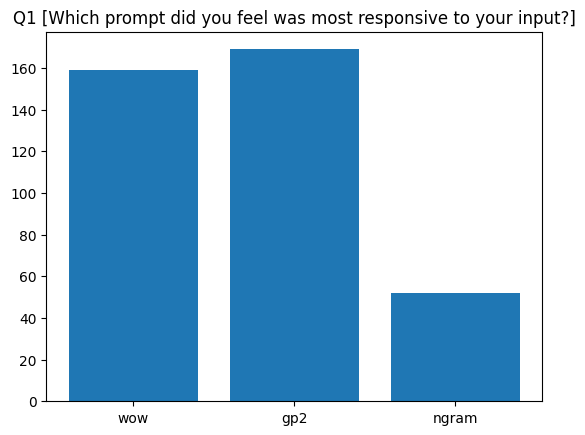

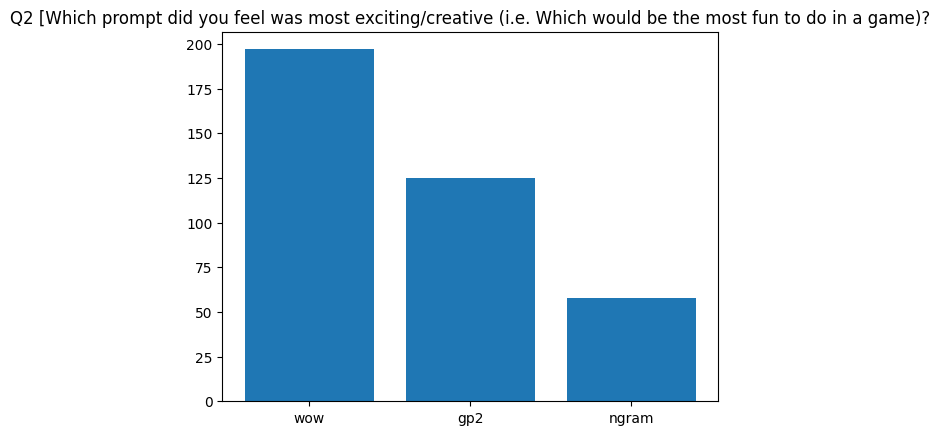

In [8]:
print('Q1 [Which prompt did you feel was most responsive to your input?]: ', Q1dict)
print('Q2 [Which prompt did you feel was most exciting/creative (i.e. Which would be the most fun to do in a game)?]: ', Q2dict)

plt.bar(Q1dict.keys(), Q1dict.values())
plt.title("Q1 [Which prompt did you feel was most responsive to your input?]")
plt.show()
plt.bar(Q2dict.keys(), Q2dict.values())
plt.title('Q2 [Which prompt did you feel was most exciting/creative (i.e. Which would be the most fun to do in a game)?')
plt.show()